In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

以2016年的数据为例：

In [5]:
path = "../Dataset/oakland-crime-statistics-2011-to-2016/"
file = "records-for-2016.csv"

In [9]:
df = pd.read_csv(path + file)

In [14]:
df.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000


# 数据可视化和摘要
## 数据摘要  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110828 entries, 0 to 110827
Data columns (total 10 columns):
Agency                       110827 non-null object
Create Time                  110827 non-null object
Location                     110828 non-null object
Area Id                      110827 non-null object
Beat                         110247 non-null object
Priority                     110827 non-null float64
Incident Type Id             110827 non-null object
Incident Type Description    110827 non-null object
Event Number                 110827 non-null object
Closed Time                  110827 non-null object
dtypes: float64(1), object(9)
memory usage: 8.5+ MB


### 标称属性
* Agency、Location、Area Id、Beat、Priority、Incident Type Id、Incident Type Description
* 给出每个可能聚会的频数  

#### Agency
**Agency**全部为 'OP':

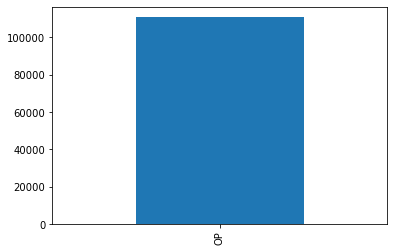

In [15]:
df['Agency'].value_counts().plot.bar()

#### Location
* 由于**Location**属性的取值较多，所以取频数为前50的进行可视化，以便于观察。

In [77]:
df['Location'] = df['Location'].map(lambda x: x.strip())

In [78]:
df['Location'].value_counts()

INTERNATIONAL BLVD       2156
AV&INTERNATIONAL BLVD    1829
MACARTHUR BLVD           1813
BROADWAY                 1476
7TH ST                   1224
                         ... 
26TH CRESTMONT DR           1
37TH WEBSTER ST             1
73RD FILBERT ST             1
79TH ORRAL ST               1
3RD TRESTLE GLEN RD         1
Name: Location, Length: 24001, dtype: int64

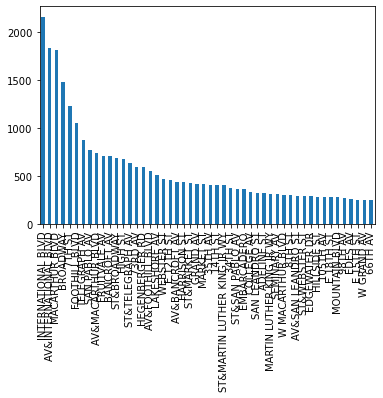

In [79]:
df['Location'].value_counts().head(50).plot.bar()

#### Area Id

In [43]:
df['Area Id'].value_counts()

P3     47425
P1     41419
P2     19610
POU     2173
PCW      194
TEC        4
JLS        1
WAG        1
Name: Area Id, dtype: int64

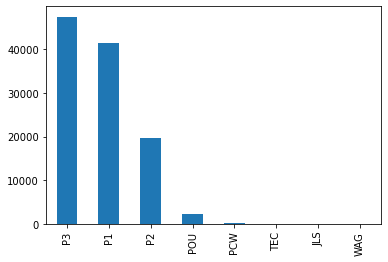

In [24]:
df['Area Id'].value_counts().plot.bar()

#### Beat
**Beat**相当于“片警”，管理的区域差不多就社区大小。

In [44]:
df['Beat'].value_counts()

04X     4515
08X     3931
26Y     3511
30Y     3473
19X     3455
30X     3416
03X     3195
23X     3076
34X     2857
07X     2831
20X     2702
29X     2646
06X     2580
03Y     2562
27Y     2517
25X     2467
31Y     2460
27X     2333
35X     2328
32X     2316
33X     2276
09X     2158
21Y     2100
32Y     2093
12Y     1987
14X     1832
26X     1766
02X     1746
24X     1704
02Y     1659
10Y     1573
10X     1557
22X     1541
17Y     1482
21X     1479
24Y     1454
31X     1439
22Y     1420
13Z     1397
15X     1393
05X     1342
01X     1304
12X     1299
31Z     1268
28X     1261
11X     1208
35Y     1159
18Y     1102
14Y     1027
17X      969
13Y      952
16Y      907
25Y      739
18X      721
16X      708
13X      630
05Y      408
PDT2      16
Name: Beat, dtype: int64

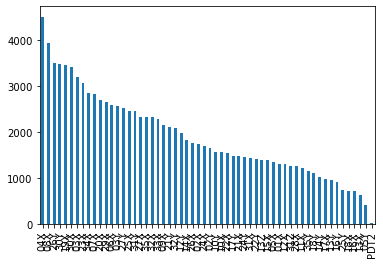

In [38]:
df['Beat'].value_counts().plot.bar()

#### Priority
**Priority**取值为1或2：

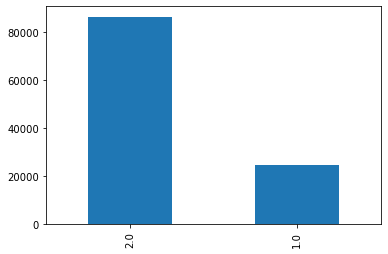

In [41]:
df['Priority'].value_counts().plot.bar()

#### Incident Type Id
* 由于**Incident Type Id**属性的取值较多，所以取频数为前50的进行可视化，以便于观察。

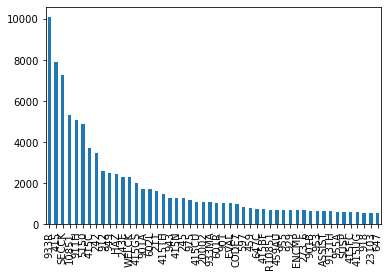

In [28]:
df['Incident Type Id'].value_counts().head(50).plot.bar()

#### Incident Type Description
* **Incident Type Description**和**Incident Type Id**对应，也只取前50：

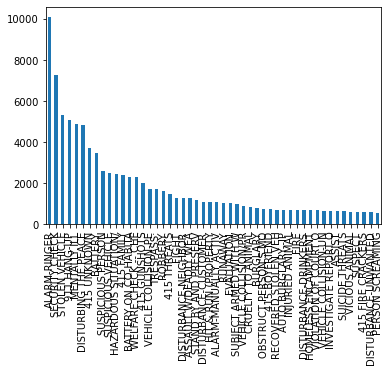

In [33]:
df['Incident Type Description'].value_counts().head(50).plot.bar()

### 数值属性
* 无数值属性

# 数据缺失的处理
## 观察数据集中缺失数据，分析其缺失的原因
* **Beat**属性缺失值最多，**Location**属性没有缺失值，其余均为1个。

In [46]:
total = df.isnull().sum().sort_values(ascending = False)
total

Beat                         581
Closed Time                    1
Event Number                   1
Incident Type Description      1
Incident Type Id               1
Priority                       1
Area Id                        1
Create Time                    1
Agency                         1
Location                       0
dtype: int64

查看该记录，是一条没有意义的记录：

In [47]:
df[df['Closed Time'].isnull()]

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
110827,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 将缺失部分剔除
剔除后，还剩下110247条数据：

In [57]:
df1 = df.copy(deep=True)
df1 = df1.dropna()

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110247 entries, 0 to 110826
Data columns (total 10 columns):
Agency                       110247 non-null object
Create Time                  110247 non-null object
Location                     110247 non-null object
Area Id                      110247 non-null object
Beat                         110247 non-null object
Priority                     110247 non-null float64
Incident Type Id             110247 non-null object
Incident Type Description    110247 non-null object
Event Number                 110247 non-null object
Closed Time                  110247 non-null object
dtypes: float64(1), object(9)
memory usage: 9.3+ MB


## 用最高频率值来填补缺失值


In [59]:
df1 = df.copy(deep=True)
# Agency
most = df1['Agency'].value_counts().index[0]
df1['Agency'] = df1['Agency'].fillna(most)
# Create Time
most = df1['Create Time'].value_counts().index[0]
df1['Create Time'] = df1['Create Time'].fillna(most)
# Area Id
most = df1['Area Id'].value_counts().index[0]
df1['Area Id'] = df1['Area Id'].fillna(most)
# Beat
most = df1['Beat'].value_counts().index[0]
df1['Beat'] = df1['Beat'].fillna(most)
# Priority
most = df1['Priority'].value_counts().index[0]
df1['Priority'] = df1['Priority'].fillna(most)
# Incident Type Id
most = df1['Incident Type Id'].value_counts().index[0]
df1['Incident Type Id'] = df1['Incident Type Id'].fillna(most)
# Incident Type Description
most = df1['Incident Type Description'].value_counts().index[0]
df1['Incident Type Description'] = df1['Incident Type Description'].fillna(most)
# Event Number
most = df1['Event Number'].value_counts().index[0]
df1['Event Number'] = df1['Event Number'].fillna(most)
# Closed Time
most = df1['Closed Time'].value_counts().index[0]
df1['Closed Time'] = df1['Closed Time'].fillna(most)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110828 entries, 0 to 110827
Data columns (total 10 columns):
Agency                       110828 non-null object
Create Time                  110828 non-null object
Location                     110828 non-null object
Area Id                      110828 non-null object
Beat                         110828 non-null object
Priority                     110828 non-null float64
Incident Type Id             110828 non-null object
Incident Type Description    110828 non-null object
Event Number                 110828 non-null object
Closed Time                  110828 non-null object
dtypes: float64(1), object(9)
memory usage: 8.5+ MB


可以看到，填补缺失值后，**Beat**属性取值最高频已超过5000：

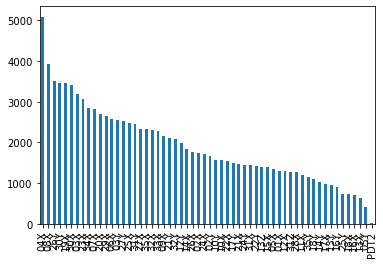

In [61]:
df1['Beat'].value_counts().plot.bar()

## 通过属性的相关关系来填补缺失值
首先将此条记录删除，因为无法通过属性的相关关系来填补：

In [62]:
df[df['Agency'].isnull()]

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
110827,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df1 = df.copy(deep=True)
df1 = df1.dropna(subset=['Agency'])

In [88]:
# df1[(df1['Location']=='76TH AVE') & (df1['Area Id']=='P3')]
df1[df1['Area Id']=='P3']
# df1[df1['Location']=='76TH AVE']
# df1[df1['Event Number']=='LOP160101000465']

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000
6,OP,2016-01-01T00:03:20.000,PIPPIN ST,P3,31Z,2.0,415GS,415 GUNSHOTS,LOP160101000011,2016-01-01T01:11:59.000
7,OP,2016-01-01T00:03:32.000,POTTER ST,P3,27X,2.0,415FC,415 FIRE CRACKERS,LOP160101000012,2016-01-01T01:43:12.000
8,OP,2016-01-01T00:04:35.000,OUTLOOK AV,P3,30Y,2.0,933R,ALARM-RINGER,LOP160101000014,2016-01-01T00:11:13.000
...,...,...,...,...,...,...,...,...,...,...
110818,OP,2016-07-31T23:32:31.000,WB AV&HOLLY ST,P3,34X,2.0,415LT,DISTURBANCE-LANDLORD,LOP160731000881,2016-08-01T00:00:27.000
110820,OP,2016-07-31T23:37:49.000,WB 84TH AV,P3,33X,2.0,5150,MENTALLY ILL,LOP160731000885,2016-08-01T00:42:43.000
110821,OP,2016-07-31T23:42:53.000,WB NAIROBI PL,P3,29X,2.0,SUSP,SUSPECT,LOP160731000887,2016-08-01T00:26:27.000
110824,OP,2016-07-31T23:50:54.000,WHITTLE 69TH AV,P3,26Y,2.0,415N,DISTURBANCE-NEIGHBOR,LOP160731000893,2016-08-01T00:08:00.000


In [89]:
grouped = df.groupby(['Beat'])
print(grouped.size())

Beat
01X     1304
02X     1746
02Y     1659
03X     3195
03Y     2562
04X     4515
05X     1342
05Y      408
06X     2580
07X     2831
08X     3931
09X     2158
10X     1557
10Y     1573
11X     1208
12X     1299
12Y     1987
13X      630
13Y      952
13Z     1397
14X     1832
14Y     1027
15X     1393
16X      708
16Y      907
17X      969
17Y     1482
18X      721
18Y     1102
19X     3455
20X     2702
21X     1479
21Y     2100
22X     1541
22Y     1420
23X     3076
24X     1704
24Y     1454
25X     2467
25Y      739
26X     1766
26Y     3511
27X     2333
27Y     2517
28X     1261
29X     2646
30X     3416
30Y     3473
31X     1439
31Y     2460
31Z     1268
32X     2316
32Y     2093
33X     2276
34X     2857
35X     2328
35Y     1159
PDT2      16
dtype: int64
